In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass



In [2]:
# options
model = IHANKModelClass(name='baseline')
set_options = True
if set_options:


    run_test = False
    save_figs = True

    # Options for figures
    path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL1703/fig/1903/'
    lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
    path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
    paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']
    target_var = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']
    paths_2 = ['PE', 'PT', 'PNT', 'p', 'CT', 'CNT', 'YH', 'P', 'W', 'w', 'PF']
    paths_extended = ['E', 'NTH', 'NNT', 'YTH', 'YNT', 'WTH', 'WNT', 'PTH', 'PNT', 'PF', 'PTH_s', 'PT', 'P', 'PE', 'PTHF', 'PE_s', 'E', 'Q', 'DomP', 'i', 'r_real', 'G', 'B', 'tau', 'div_TH', 'div_NT', 'inc_TH', 'inc_NT', 'ra', 'p', 'n_NT', 'n_TH', 'A_hh', 'C_hh', 'UC_TH_hh', 'UC_NT_hh', 'E_hh', 'CNT_hh', 'CT_hh', 'U_hh', 'CT', 'CNT', 'CTF', 'CTH', 'CTH_s', 'A', 'EX', 'CTHF', 'CE', 'YH', 'W', 'w', 'N', 'INC', 'inc']
    # paths_ = ['YH', 'CT', 'CNT', 'W', 'P', 'w', 'r_real',  'Q', 'p', 'inc', 'INC']
    paths_ = [ 'P', 'W',  'w', 'YH', 'CT', 'CNT', 'r_real', 'Q', 'p', 'CTH_s', 'YTH', 'YNT']

    # Options for shock 

    shock_PE_i, shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model, scale=0.05, rho = 0.8) 
    
    # Options for tables
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)  # Increase width to avoid line breaks
    pd.set_option('display.colheader_justify', 'center')  # Center column headers

    # Options for comparing models
    ddd = SimpleNamespace()
    ddd.T_max = 50
    ddd.ncols = 3
    ddd.varnames = paths_extended
    ddd.lvl_value = lvl_path
    ddd.do_shocks = False
    ddd.do_targets = False
    ddd.filename = None





    # Parameters to look at 
    # model.par.eta_s = 0.51
    # model.par.etaF = 0.51
    # model.par.nu = 0.7
    # model.par.etaE = 0.01
    # model.par.mon_policy = 'taylor'
    # model.par.phi = 1.5
    # model.par.kappa = 2.0
    # model.par.gamma = 0.4
    # model.par.nu = 0.3


## Models

In [3]:
model_baseline = IHANKModelClass(name='Non-Homothetic Preferences')
model_baseline.find_ss()
model_baseline.compute_jacs()
model_baseline.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [4]:
model_homothetic = IHANKModelClass(name='Homothetic Preferences')
model_homothetic.par.epsilon = 0.0
model_homothetic.par.gamma = 0.18
model_homothetic.find_ss()
model_homothetic.compute_jacs()
model_homothetic.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [5]:
models = [model_baseline, model_homothetic]

## Shock

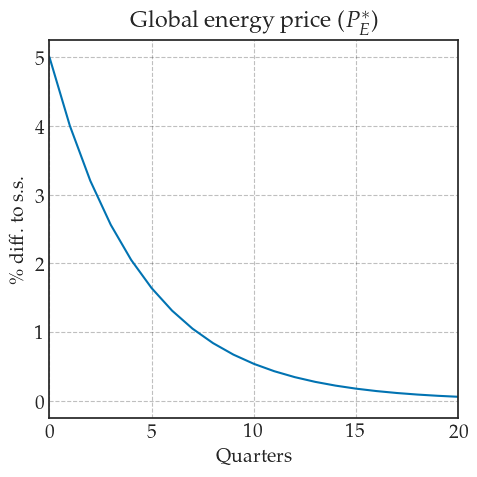

In [6]:
fig = figs.plot_PE_s(model_baseline)
if save_figs: fig.savefig('plots/PE_shock.png')

## Jacobians 

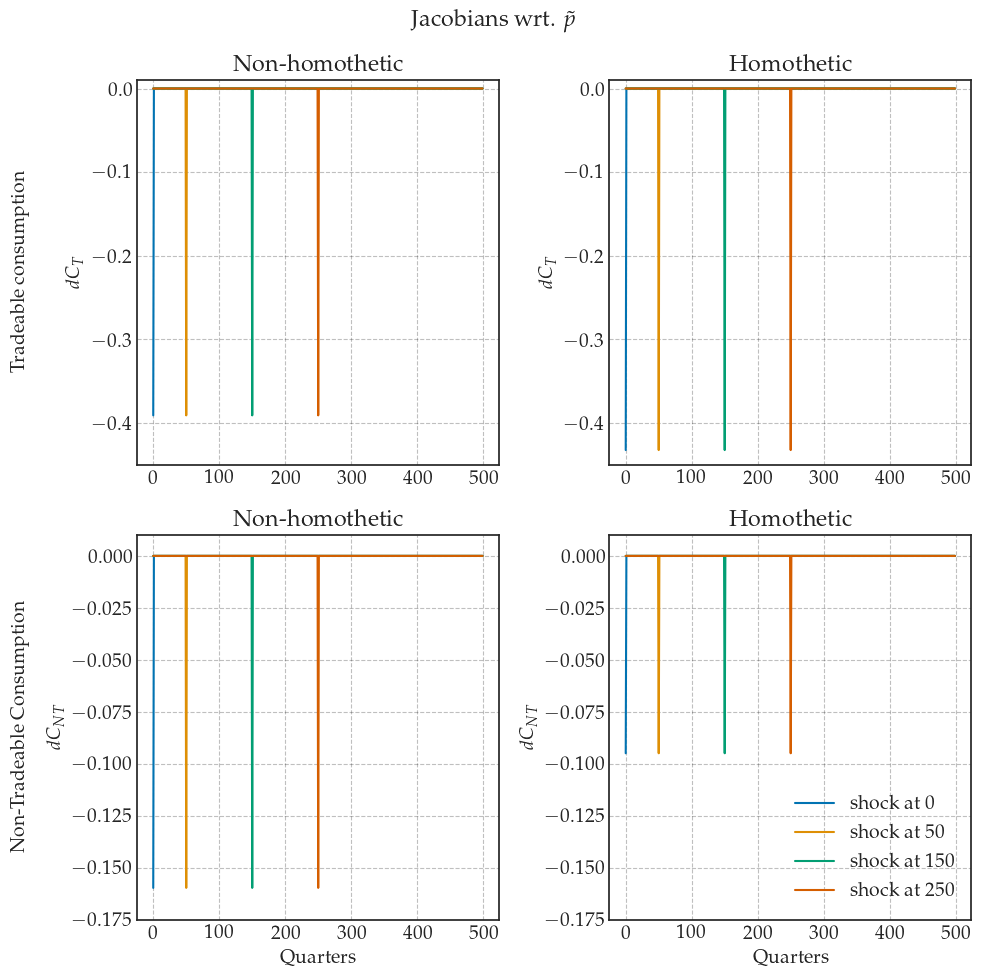

In [7]:
fig = figs.plot_jac_p(models)
if save_figs: fig.savefig('plots/jac_p.png')

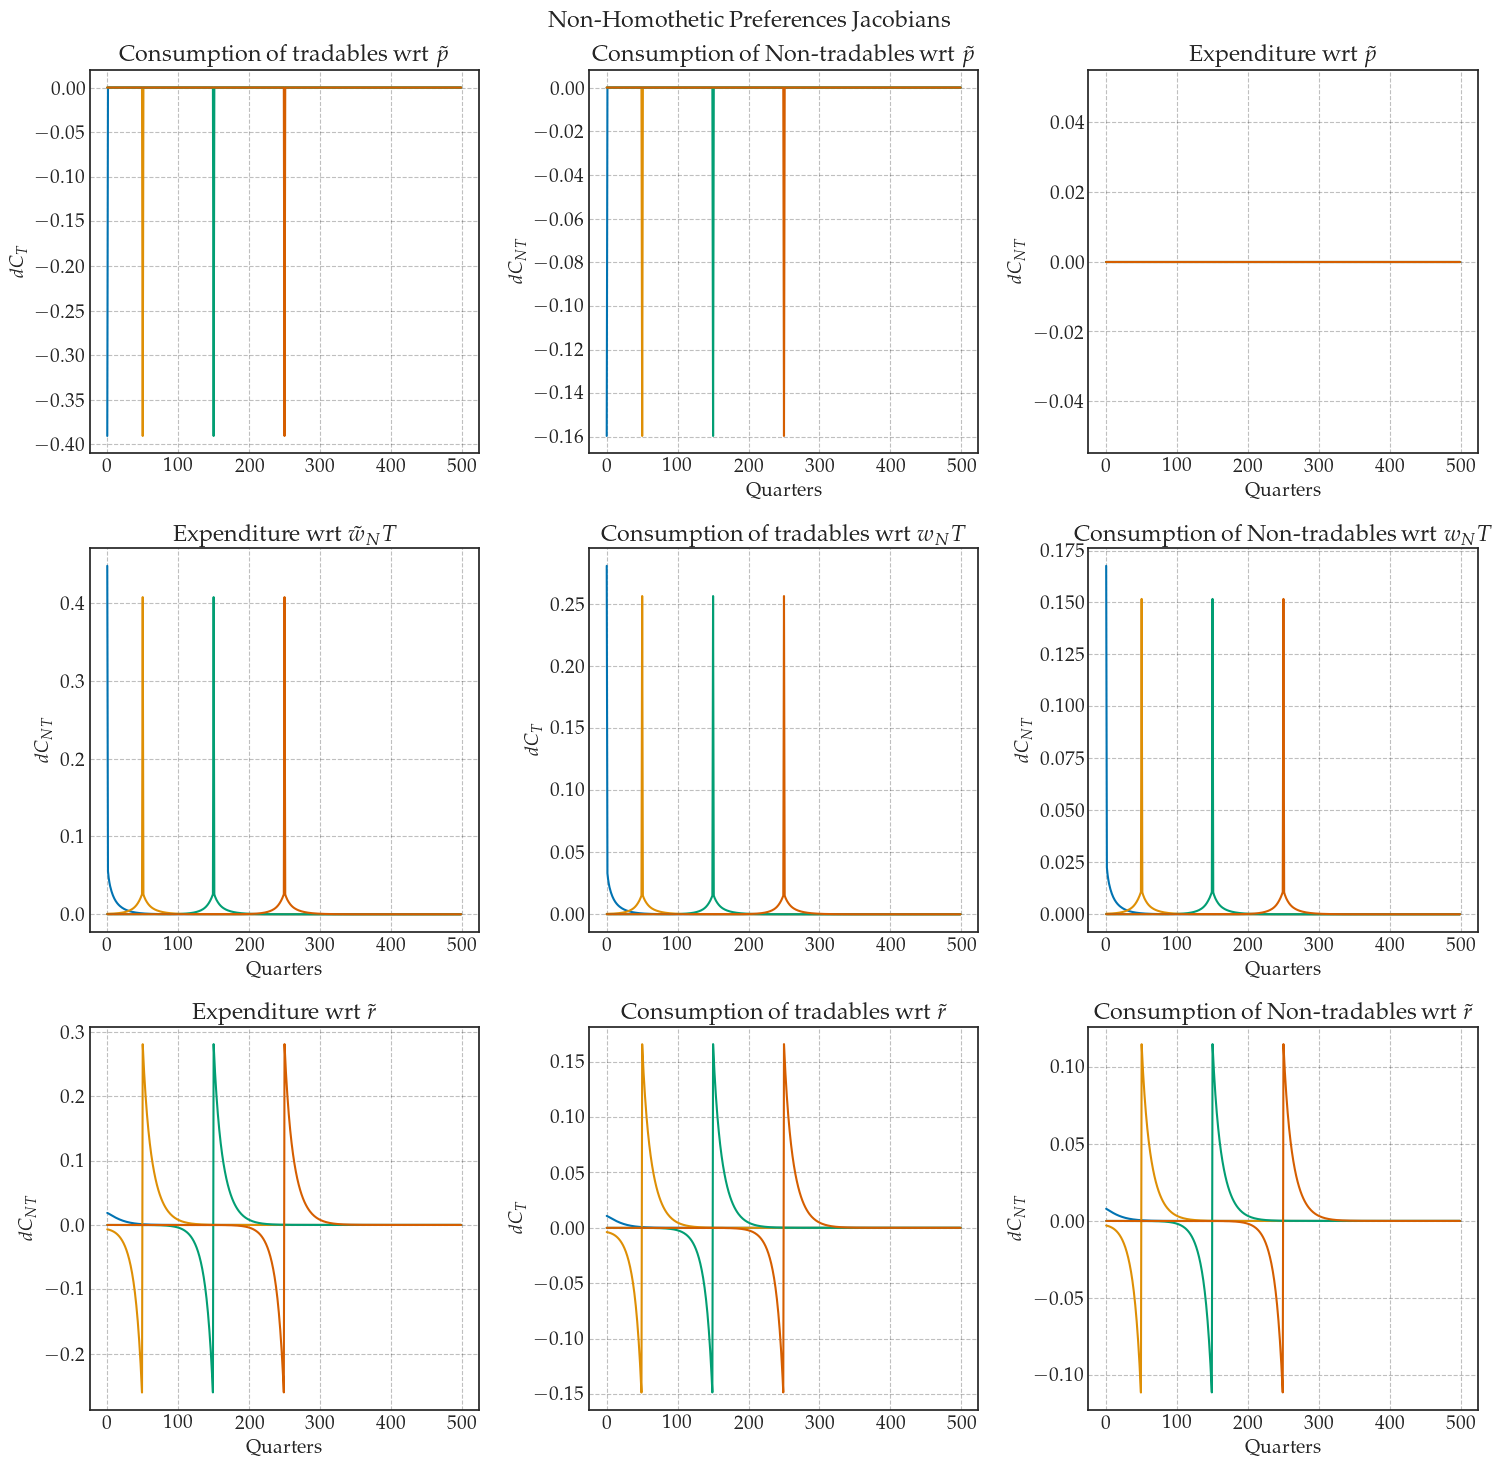

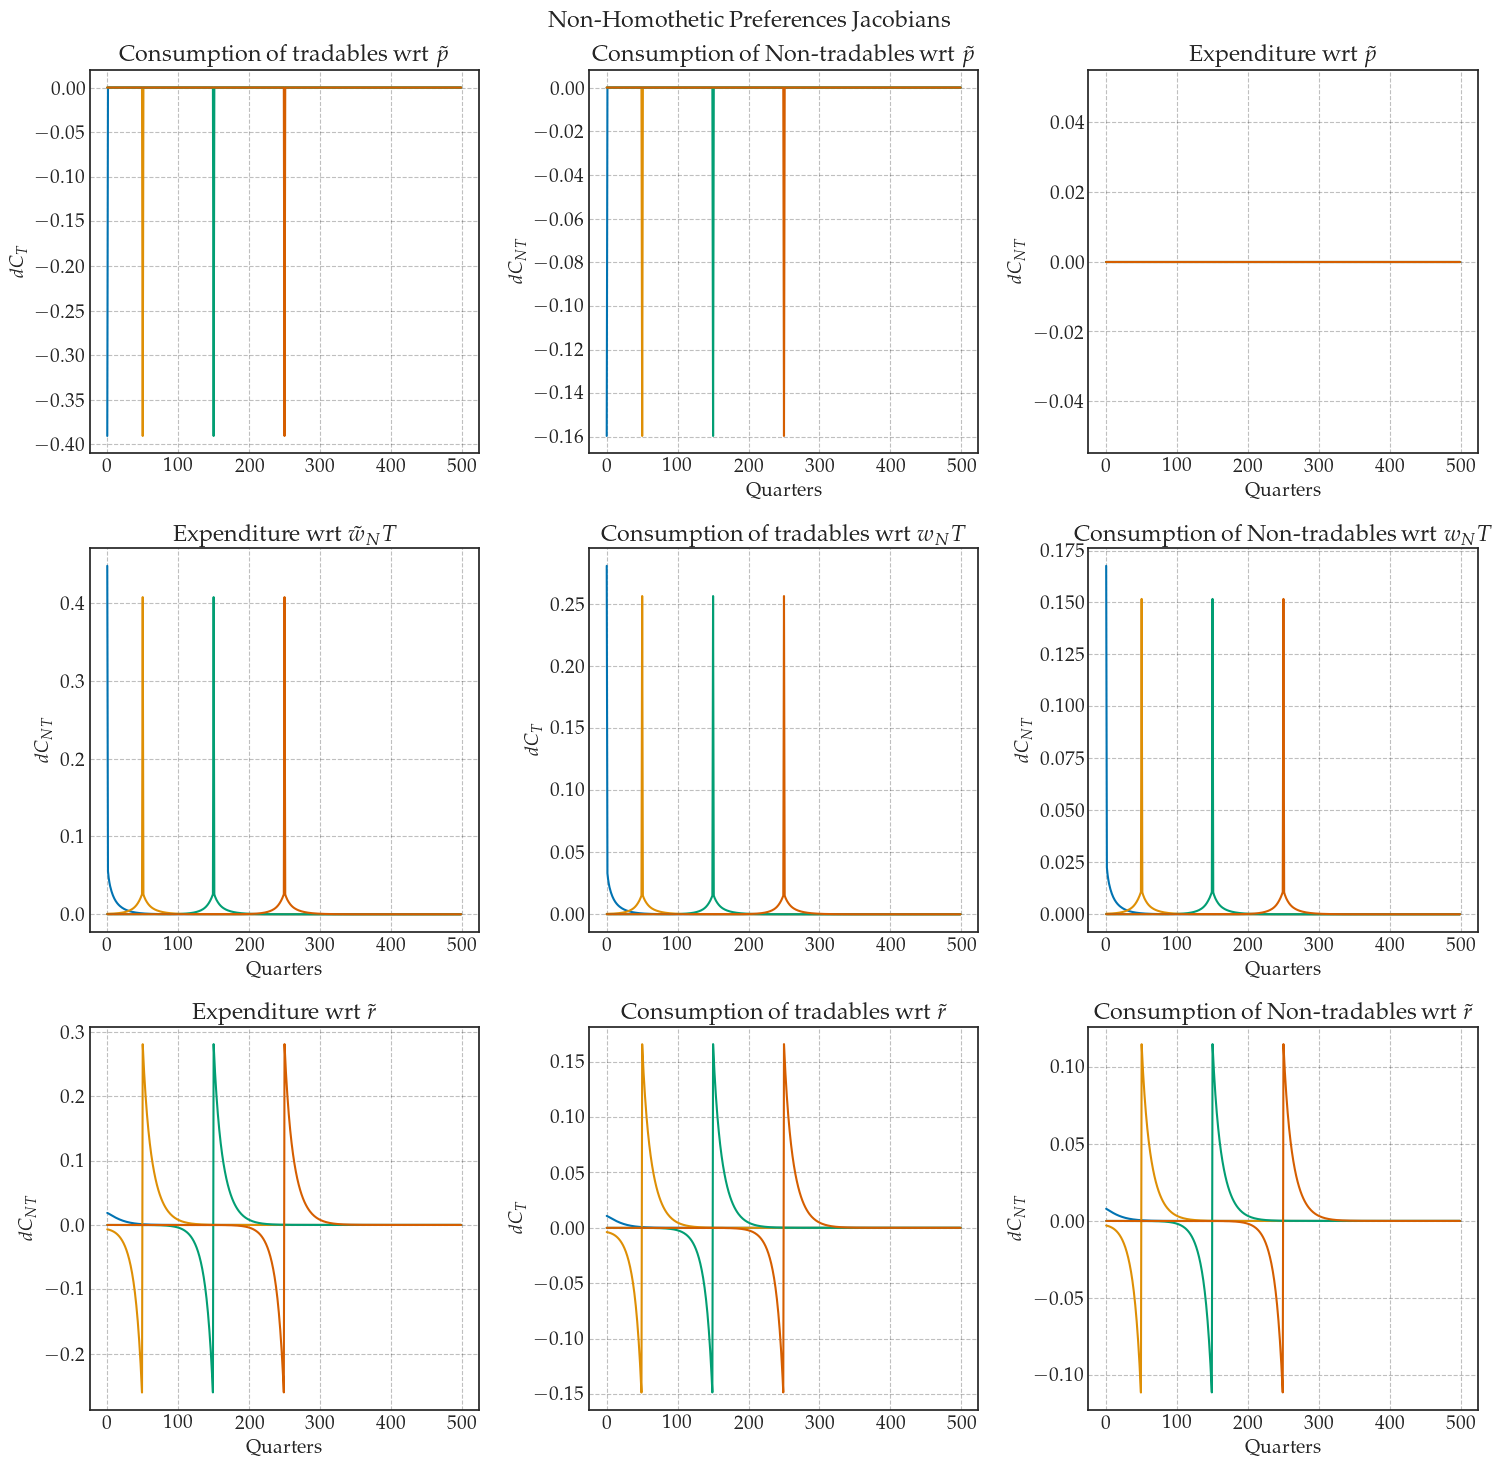

In [8]:
# All jacobians
figs.plot_jac(model_baseline)

### IRF's 

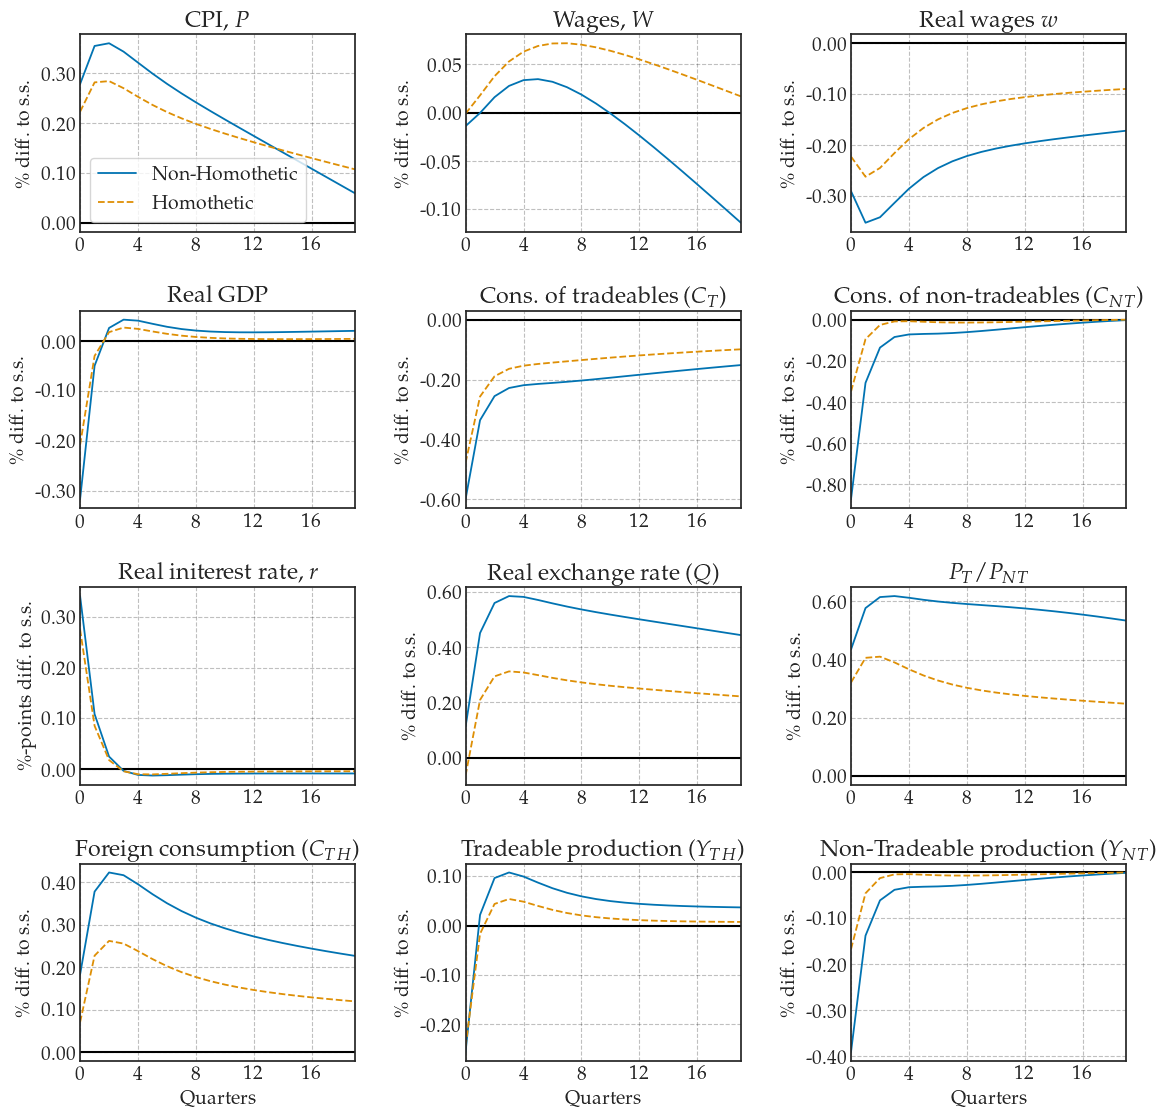

In [9]:


fig = figs.show_IRFs([model_baseline, model_homothetic], paths_, ['Non-Homothetic', 'Homothetic'], scale=False, maxcol=3)
fig.savefig('plots/IRF_standard.png')

## Decomposition

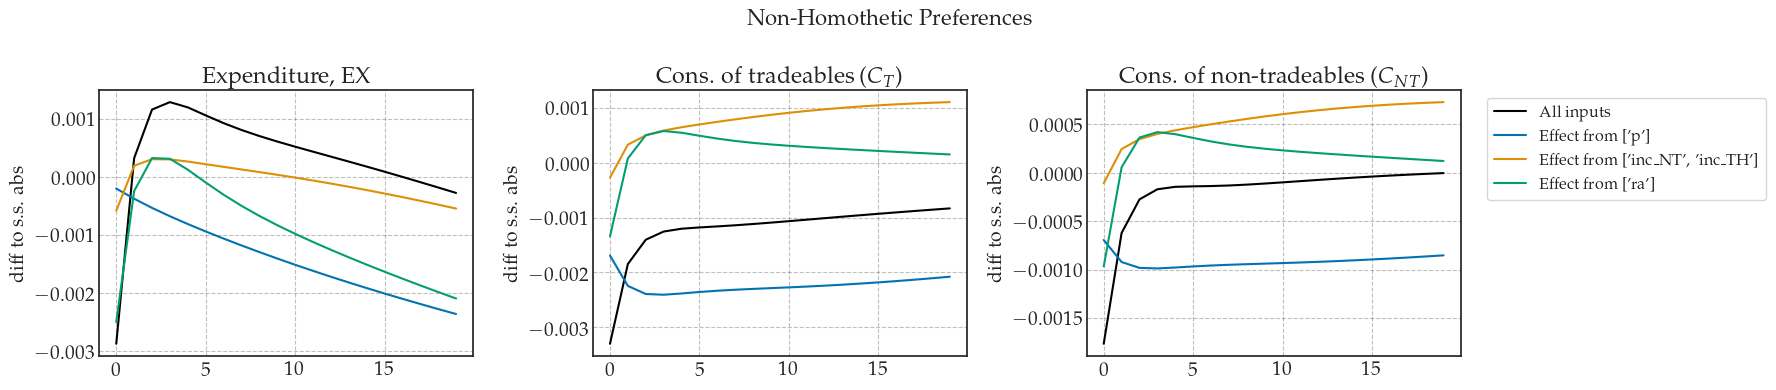

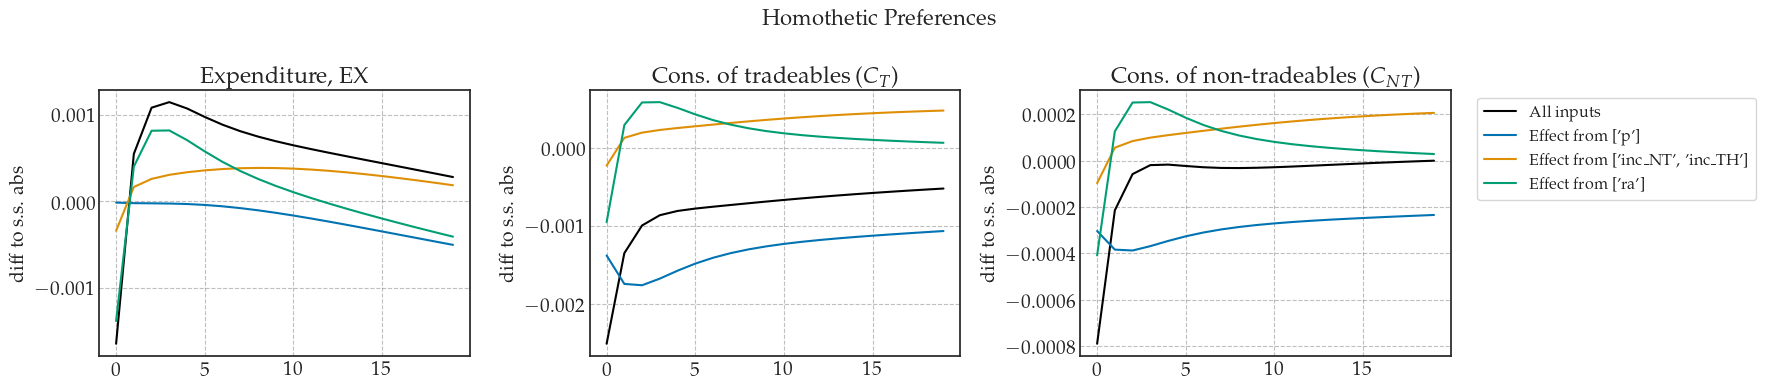

In [10]:
for model in models:
   fig = figs.plot_dec(model)
   fig.savefig(f'plots/dec_{model.name}.png')

## Prices

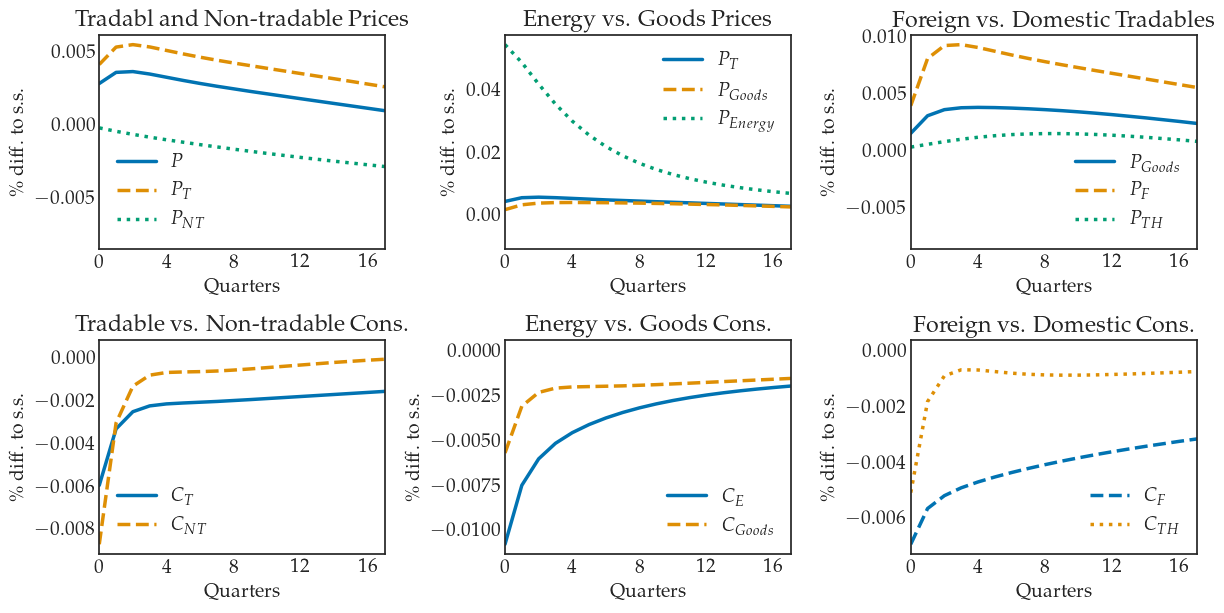

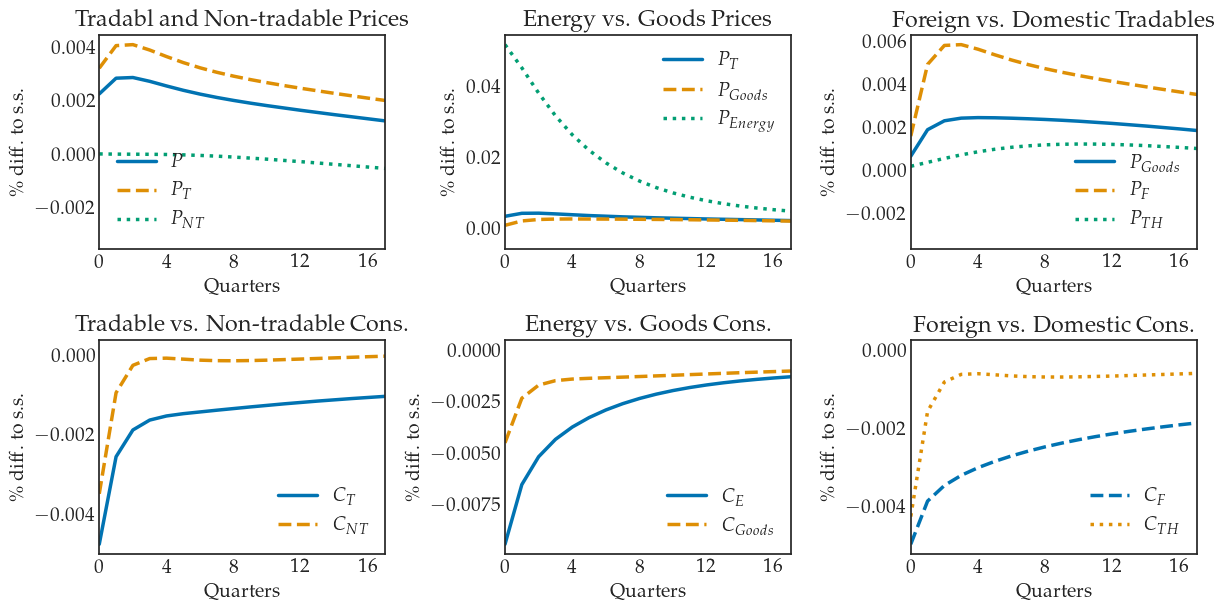

In [17]:
for model in models:
    fig =  figs.show_pc_IRFs(model)
    if save_figs: fig.savefig(f'plots/pc_IRF_{model.name}.png', dpi=300, bbox_inches='tight')

# fig = figs.show_pc_IRFs(model_baseline)
# fig.savefig( f'plots/pc_IRF_{model_baseline.name}.png', dpi=300, bbox_inches='tight')

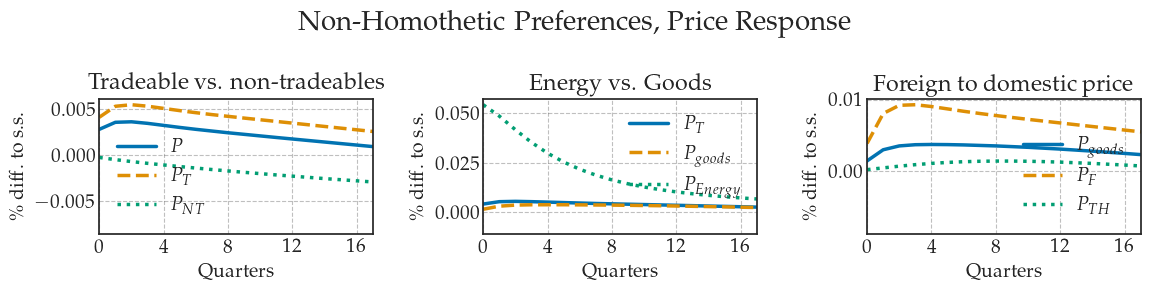

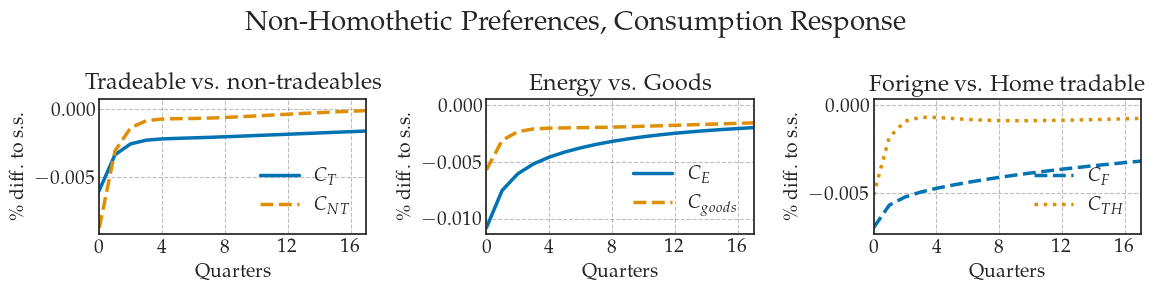

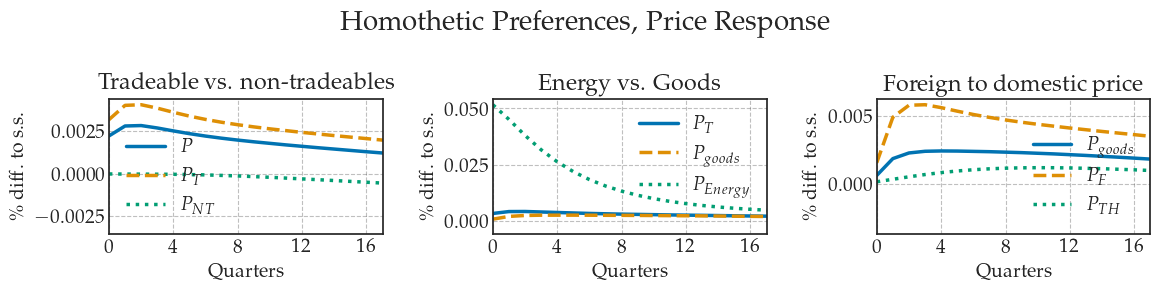

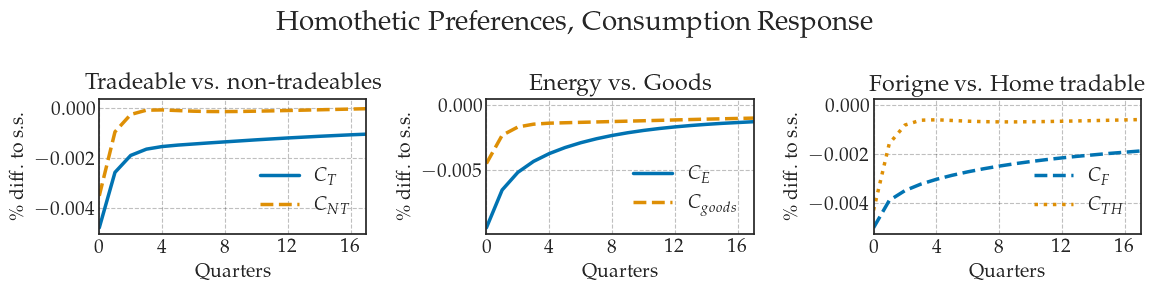

In [11]:
for model in models:
    fig =  figs.show_price_IRFs(model)
    if save_figs: fig.savefig(f'plots/P_{model.name}.png')   
    fig = figs.show_c_IRFs(model)
    if save_figs: fig.savefig(f'plots/c_{model.name}.png')


# Sensitivity 


## Comparing with model with lower IES 

In [12]:
model_homothetic_epsilon = IHANKModelClass(name='Homothetic, IES lower')
# model_homothetic_epsilon.par.epsilon = 0.0
model_homothetic_epsilon.par.gamma = 0.18
model_homothetic_epsilon.par.brute_force_C = True
model_homothetic_epsilon.par.pref = 'homothetic_force'
model_homothetic_epsilon.find_ss()

model_homothetic_epsilon.compute_jacs()
model_homothetic_epsilon.find_transition_path(shocks=shock_PE_s, do_end_check=False)
print(model_homothetic_epsilon.par.eta_T_RA)
fig = figs.show_IRFs([model_baseline, model_homothetic_epsilon, model_homothetic], paths_, labels=[model_baseline.name, model_homothetic_epsilon.name,  model_homothetic.name],  scale=False, maxcol=3)

0.40000000000000013
